Loading packages required to define the optimization model

In [1]:
using JuMP
import Gurobi; const GRB_ENV = Gurobi.Env();

Academic license - for non-commercial use only


Create a function that for a given volume of cone, minimizes both slant area and total area as well.

In [2]:
"""
`function create_model(Vᴸ::Float64)`

Create a model and returns two objective for example problem of Multi-objective optimization
"""

function create_model(Vᴸ::Real)
    m = Model(optimizer_with_attributes(() -> Gurobi.Optimizer(GRB_ENV), 
            "NonConvex" => 2, "OutputFlag" => 0))

    @variables(m, begin
        0 ≤ r ≤ 10 # Radius of Cone
        0 ≤ r2 ≤ 100 # Radius of Cone squared
        0 ≤ h ≤ 20 # Height of Cone
        0 ≤ s ≤ sqrt(10^2+20^2) # Slant height of Cone
        Vᴸ ≤ V ≤ π*10^2*20/3 # Volume of Cone
        0 ≤ B ≤ π*10^2 # Base area of cone
        0 ≤ S ≤ π*10*sqrt(10^2+20^2) # Lateral Surface Area
        0 ≤ T ≤ π*10^2 + π*10*sqrt(10^2+20^2) # Total Surface Area
    end)

    @constraints(m, begin
        radius_sq, r2 == r^2
        Vol_Calc, V == π*r2*h/3
        BA_Calc, B == π*r2
        SA_Calc, S == π*r*s
        s_calc, s^2 == r2 + h^2
        TA_calc, T == B + S
    end)

    OBJs = [S, T]
    return m, OBJs
end

create_model (generic function with 1 method)

In [3]:
m, OBJs = create_model(200);

Calling on `MOJuMP` to use `eff_pareto` function and finding pareto optimal points. I am also passing extra variables `r` and `h` to be obtained for all the solution points.

In [4]:
import Pkg; Pkg.activate("../.")
using MOJuMP
p, v = eff_pareto(m, OBJs, [m[:r], m[:h]]);

Activating environment at `~/MOJuMP/Project.toml`


This is just to plot the pareto curve

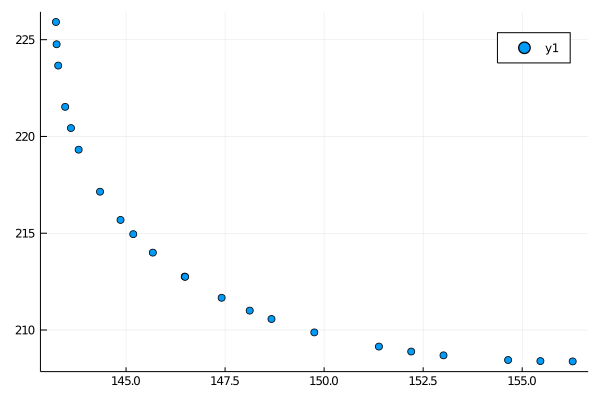

In [5]:
using Plots, StatsPlots
using DataFrames

@df (p |> DataFrame) scatter(cols(1), cols(2))